In [2]:
pip install pandas mysql-connector-python matplotlib

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 507.7 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/9.9 MB 507.7 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.9 MB 587.4 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.9 MB 645.3 kB/s eta 0:00:14
   ----- ---------------------------------- 1.3/9.9 MB 740.3 kB/s eta 0:00:12
   ------ --------------------------------- 1.6/9.9 MB 823.2 kB/s eta 0:00:11
   ------ --------------------------------- 1.6/9.9 MB 823.2 kB/s eta 0:00:11
   ------- -------------------------------- 1.8/9.9 MB 761.2 kB/s eta 0:00:11
   ------- --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Kiaradiallo2020",
    database="classicmodels"
)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_21364\189581204.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


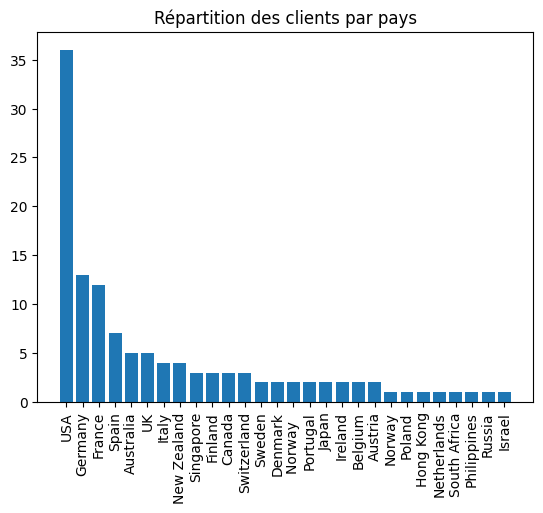

In [4]:
query = """
SELECT country, COUNT(*) AS nb_clients
FROM customers
GROUP BY country
ORDER BY nb_clients DESC;
"""

df = pd.read_sql(query, conn)

plt.figure()
plt.bar(df["country"], df["nb_clients"])
plt.xticks(rotation=90)
plt.title("Répartition des clients par pays")
plt.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_21364\4040092861.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


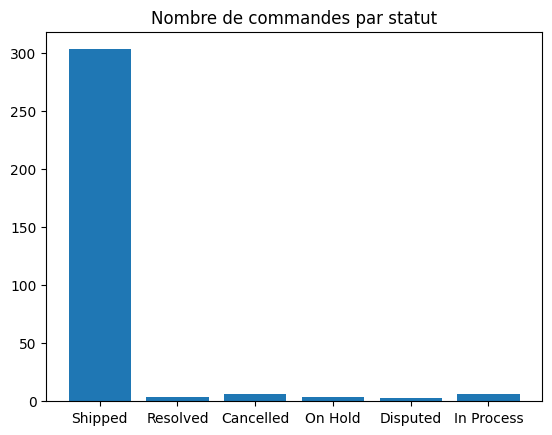

In [5]:
query = """
SELECT status, COUNT(*) AS nb
FROM orders
GROUP BY status;
"""

df = pd.read_sql(query, conn)

plt.figure()
plt.bar(df["status"], df["nb"])
plt.title("Nombre de commandes par statut")
plt.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_21364\679931803.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


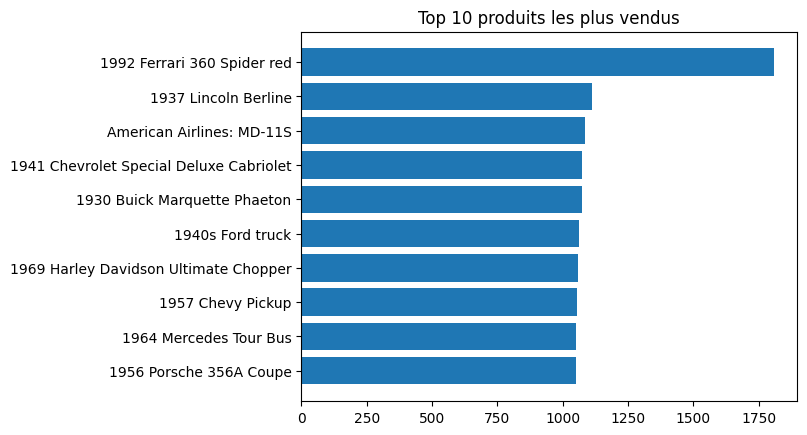

In [6]:
query = """
SELECT p.productName, SUM(od.quantityOrdered) AS quantite
FROM orderdetails od
JOIN products p ON od.productCode = p.productCode
GROUP BY p.productName
ORDER BY quantite DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)

plt.figure()
plt.barh(df["productName"], df["quantite"])
plt.title("Top 10 produits les plus vendus")
plt.gca().invert_yaxis()
plt.show()